In [1]:
import anesthetic as ns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
chains = ns.read_chains("diffusion")

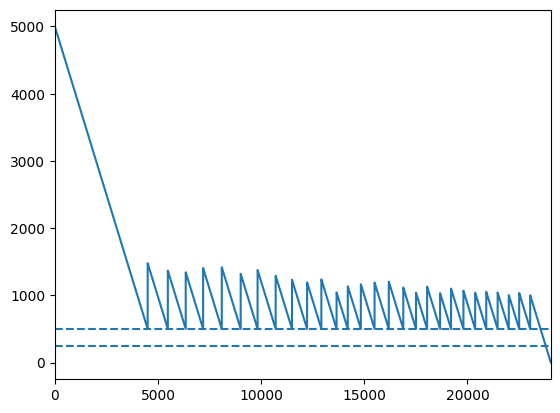

In [3]:
chains.nlive.plot()
plt.xlim(0,len(chains))
plt.hlines(250,0,len(chains),linestyles='dashed')
plt.hlines(500,0,len(chains),linestyles='dashed')

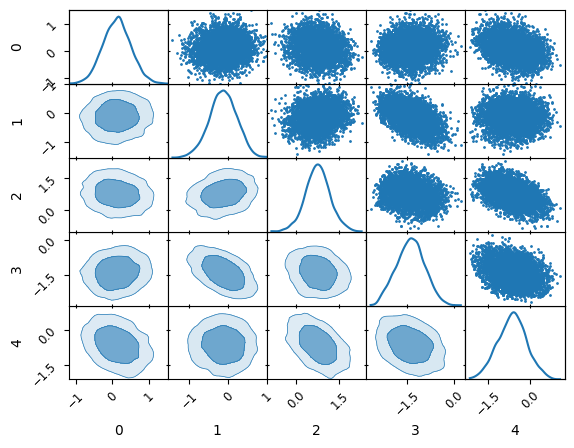

In [4]:
a=ns.MCMCSamples(chains.set_beta(0.01).compress().to_numpy()[...,:5]).plot_2d()
# pc.plot_2d(a)

In [5]:
chains.compress(ncompress="equal")

,0,1,2,3,4,logL,logL_birth,nlive
13905,0.106252,-0.039126,0.815958,-1.536174,-0.586897,-1.982546,-3.855408,797.0
14447,0.193243,-0.222134,0.840947,-1.455497,-0.811415,1.517510,-3.855408,889.0
14596,0.011952,-0.157093,0.866518,-1.431236,-0.777413,2.203096,-3.855408,740.0
14626,0.224840,-0.187234,0.897437,-1.469778,-0.908716,2.375746,-3.855408,710.0
14693,0.079315,-0.120138,0.920998,-1.388405,-0.837775,2.784374,0.321096,643.0
...,...,...,...,...,...,...,...,...
22350,0.134707,-0.085008,0.863974,-1.527275,-0.803315,11.227250,11.212898,661.0
22406,0.135428,-0.072799,0.872628,-1.550551,-0.794749,11.229901,11.212898,605.0
23316,0.137253,-0.091446,0.874125,-1.529890,-0.809887,11.257582,11.234645,730.0
23425,0.128152,-0.085780,0.873516,-1.536918,-0.801861,11.260028,11.252039,621.0


In [68]:
import pickle
import numpy as np
from anesthetic import MCMCSamples
trace = pickle.load(open("trace.pkl", "rb"))
# pc = ns.read_chains("../chains/test")

,0,1,2,3,4
0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


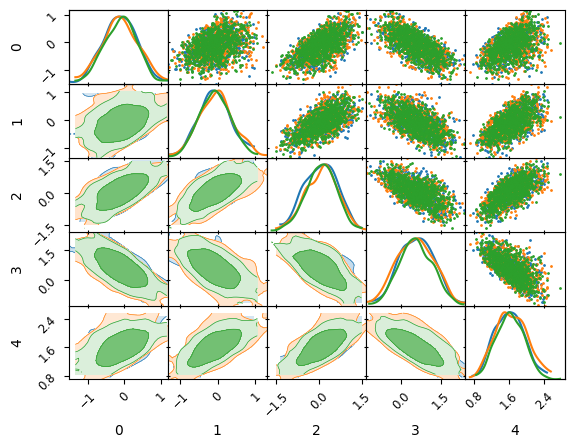

In [69]:

i=list(trace.live.keys())[-1]
diff = np.asarray(trace.diff[i])
live = np.asarray([xi.x for xi in trace.live[i]])
points = np.asarray([xi.x for xi in trace.accepted_live[i]])
prior = np.asarray(trace.prior[i].squeeze())
a = MCMCSamples(diff).plot_2d()
# a=MCMCSamples(prior).plot_2d()
a=MCMCSamples(live).plot_2d(a)
MCMCSamples(points).plot_2d(a)
# pc.plot_2d(a)
# len(diff), len(live), len(points)

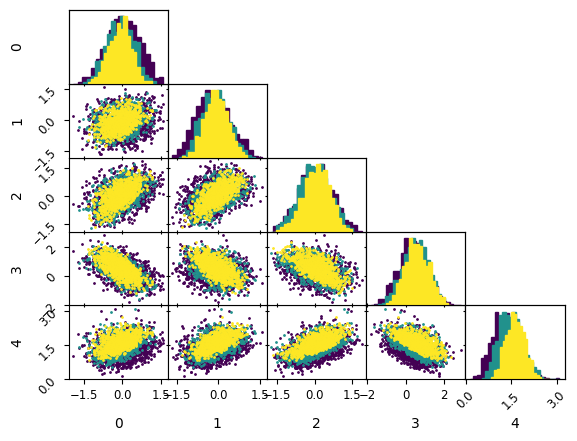

In [70]:
# prior = model.prior.rvs(1000)
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(0, 1, len(trace.live.keys()))]
f,a = ns.make_2d_axes(np.arange(5),upper=False)
# a = MCMCSamples(prior).plot_2d(kinds ={"lower":"kde_2d","diagonal":"hist_1d"},c = colors[0])
for i in trace.live.keys():
    points = np.asarray([xi.x for xi in trace.accepted_live[i]])
    MCMCSamples(points).plot_2d(a,kinds = {"lower":"scatter_2d","diagonal":"hist_1d"},c= colors[i],ec = colors[i])


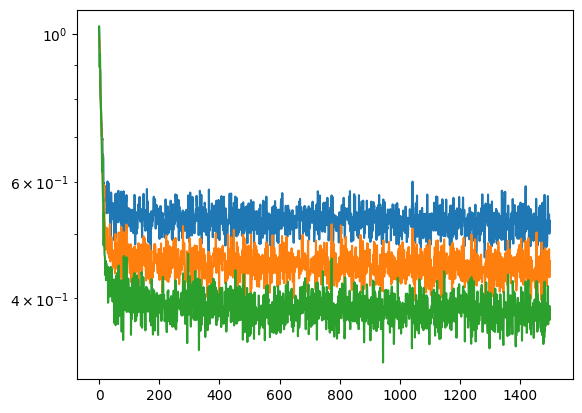

In [71]:
import matplotlib.pyplot as plt
for k in trace.losses.keys():
    plt.yscale("log")
    plt.plot(trace.losses[k])

In [46]:
live_x = np.asarray([y.x for y in trace.live[trace.iteration[-2]]])
active_x = np.asarray([y.x for y in trace.accepted_live[trace.iteration[-2]]])
# diff_x = np.asarray([y.x for y in trace.diff[trace.iteration[-3]]])

IndexError: list index out of range

In [ ]:
trace.diff

{0: array([[-0.8889971 ,  0.74920356,  0.6005047 ,  0.89162827,  1.0414293 ],
        [-0.11204686,  0.26588884,  0.89678794, -0.6660369 ,  1.1214484 ],
        [-1.1708583 , -0.72608423, -0.25749892,  1.662241  ,  0.79108614],
        ...,
        [-0.4017539 , -1.053039  , -0.6273036 ,  0.4614612 ,  1.559408  ],
        [-0.22589093,  0.01545274, -0.88787514,  0.9280869 ,  0.463427  ],
        [-0.19983432, -0.01919235,  1.2403666 , -0.45222336,  1.2567042 ]],
       dtype=float32),
 1: array([[-0.79453856,  0.42304564, -0.46181116,  1.5807422 ,  1.5298045 ],
        [-0.3832414 ,  1.0963085 ,  0.5093762 ,  1.4262702 ,  2.4093745 ],
        [-0.32842296, -0.15753104, -1.0621432 ,  1.2534509 ,  1.1078516 ],
        ...,
        [-0.7618902 , -0.6695258 ,  0.3255773 ,  0.5360055 ,  1.6465626 ],
        [ 0.7633006 , -0.14731935,  0.43350485,  0.23986009,  1.4665202 ],
        [ 0.26429635, -0.27148375,  0.49171817, -0.02057612,  1.5577705 ]],
       dtype=float32),
 2: array([[-0.01522

,0,1,2,3,4
0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


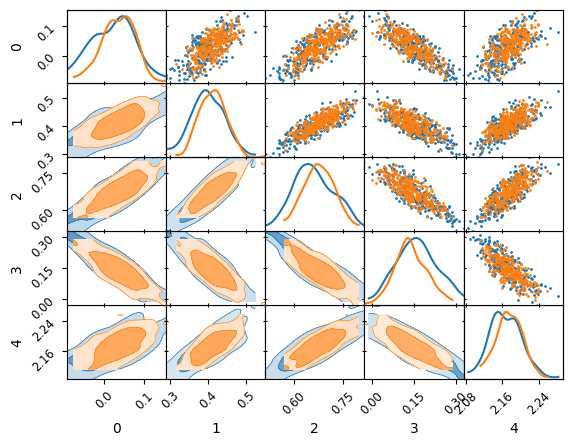

In [ ]:
a=MCMCSamples(live_x).plot_2d()
MCMCSamples(active_x).plot_2d(a)

In [ ]:
from fusions.cfm import CFM
from fusions.utils import unit_hyperball

In [ ]:
diff = CFM(n=5,latent=unit_hyperball(5))
diff.train(live_x,n_epochs=5000,noise = 1e-5)
x = diff.rvs(500)


100%|██████████| 5000/5000 [00:08<00:00, 578.56it/s]


,0,1,2,3,4
0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


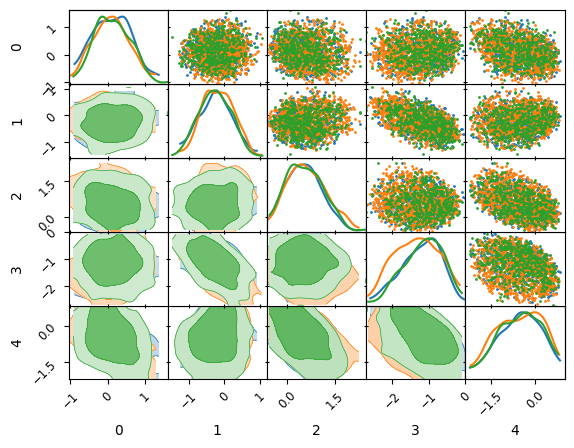

In [ ]:
a=MCMCSamples(live_x).plot_2d()
MCMCSamples(active_x).plot_2d(a)
MCMCSamples(x).plot_2d(a)

In [ ]:
chains.logX()
from scipy.special import logsumexp
logsumexp((chains.logdX(),chains.logL)) 

19.713694279621055

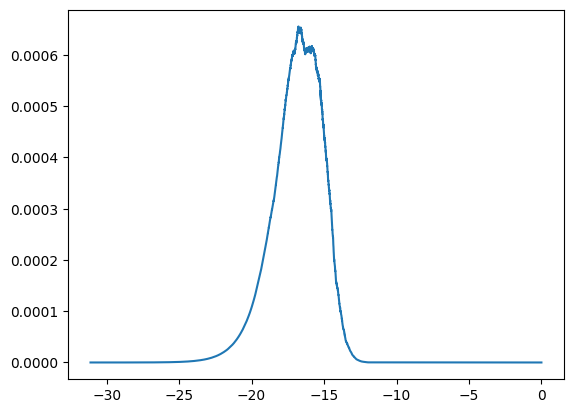

In [ ]:
plt.plot(chains.logX(),np.exp(chains.logL + chains.logX()))


<Axes: >

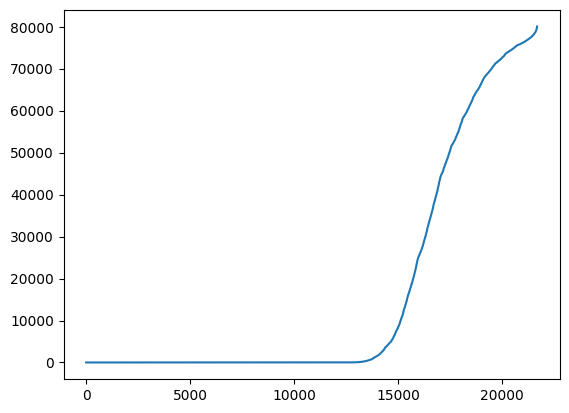

In [ ]:
np.exp(chains.logL).plot()
# plt.yscale("log")


In [62]:
import numpy as np 
import anesthetic as ns
from lsbi.model import MixtureModel
dims = 5
data_dims = dims
# v hard
np.random.seed(123456)
# np.random.seed(1)

mixtures = 5
A = np.random.rand(mixtures, data_dims, dims)
# A /= np.linalg.norm(A, axis=2)[:, :, None] 
# A *=.008
TargetModel = MixtureModel(
    # M=np.stack([np.eye(dims), -np.eye(dims)]),
    M=A,
    mu=np.zeros(dims),
    Sigma=np.eye(dims),
    m=np.zeros(data_dims),
    C=np.ones(data_dims) * .1**2,
)
data = TargetModel.evidence().rvs()
logz = TargetModel.evidence().logpdf(data)

In [63]:
A[0]

array([[0.12696983, 0.96671784, 0.26047601, 0.89723652, 0.37674972],
       [0.33622174, 0.45137647, 0.84025508, 0.12310214, 0.5430262 ],
       [0.37301223, 0.44799682, 0.12944068, 0.85987871, 0.82038836],
       [0.35205354, 0.2288873 , 0.77678375, 0.59478359, 0.13755356],
       [0.85289978, 0.23550748, 0.14622723, 0.58986877, 0.57401177]])

,0,1,2,3,4
0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


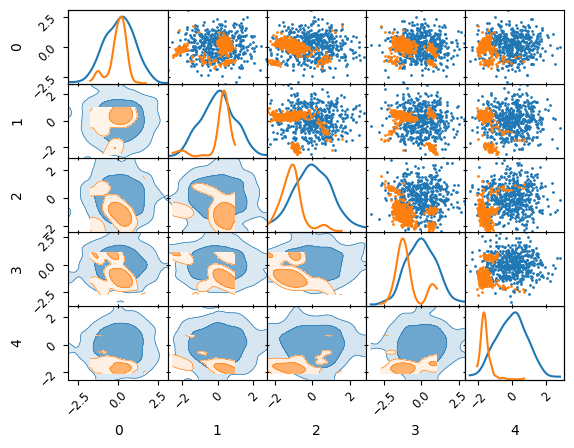

In [66]:
a = ns.MCMCSamples(TargetModel.prior().rvs(500)).plot_2d()
ns.MCMCSamples(TargetModel.posterior(data).rvs(500)).plot_2d(a)